## Problem Statement 

### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### For many incumbent operators, retaining high profitable customers is the number one business goal.

### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
### We will try to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [215]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#import sklearn modules
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#import statsmodels api
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import xgboost
import xgboost as xgb

#set options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## Section 1: Data Preparation

In [216]:
#read csv file into df

df = pd.read_csv('telecom_churn_data.csv')

In [217]:
#check head of dataframe
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [218]:
#check shape of data
df.shape
print(f'There are {df.shape[0]} observations and {df.shape[1]} columns.')

There are 99999 observations and 226 columns.


### 1.1 Handling Missing Data

In [219]:
#subset the numeric variables and categorical variables
num_var = df.select_dtypes(include=['float64', 'int64'])
cat_var = df.select_dtypes(include=['object'])
print(f'There are {num_var.shape[1]} numeric columns and {cat_var.shape[1]} categorical columns.')

There are 214 numeric columns and 12 categorical columns.


In [220]:
#columns with missing values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_pct = round(df[col].isnull().sum()/len(df) * 100, 2)
        print(f'{col} has {missing_pct} pct of missing values')

loc_og_t2o_mou has 1.02 pct of missing values
std_og_t2o_mou has 1.02 pct of missing values
loc_ic_t2o_mou has 1.02 pct of missing values
last_date_of_month_7 has 0.6 pct of missing values
last_date_of_month_8 has 1.1 pct of missing values
last_date_of_month_9 has 1.66 pct of missing values
onnet_mou_6 has 3.94 pct of missing values
onnet_mou_7 has 3.86 pct of missing values
onnet_mou_8 has 5.38 pct of missing values
onnet_mou_9 has 7.75 pct of missing values
offnet_mou_6 has 3.94 pct of missing values
offnet_mou_7 has 3.86 pct of missing values
offnet_mou_8 has 5.38 pct of missing values
offnet_mou_9 has 7.75 pct of missing values
roam_ic_mou_6 has 3.94 pct of missing values
roam_ic_mou_7 has 3.86 pct of missing values
roam_ic_mou_8 has 5.38 pct of missing values
roam_ic_mou_9 has 7.75 pct of missing values
roam_og_mou_6 has 3.94 pct of missing values
roam_og_mou_7 has 3.86 pct of missing values
roam_og_mou_8 has 5.38 pct of missing values
roam_og_mou_9 has 7.75 pct of missing values


We can drop all the date related columns

In [221]:
# drop the date columns
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
            'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
            'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

df.drop(date_cols, axis=1, inplace=True)

We can impute other missing values as zero below as they genuinely mean zero (e.g missing value for `total_rech_data_6` just means user has not recharged data in June, same goes to missing value for `fb_user_6` just means user is not a facebook user in June.

In [222]:
# impute missing values with zero
df.fillna(0, inplace=True)

In [223]:
#Check again if any columns have missing values

for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_pct = round(df[col].isnull().sum()/len(df) * 100, 2)
        print(f'{col} has {missing_pct} pct of missing values')

Nothing gets printed, there are no more missing values.

### 1.2 Identify high-value customers

Since we only need to predict churn for high-value customers where high-value customers are defined as: Those who have recharged with amount more than 70th percentile of the average recharge amount in the first 2 months (June and July).

The calculations will be as below:
1. Calculate data recharge amount for each month (June & July) by multiplying `total_rech_data_` and `av_rech_amt_data_`. 
2. Calling recharge amount for each month (June & July) is identified by `total_rech_amt_`
3. Calculate total recharge each month as sum of 1 and 2 for each month.
4. Calculate average recharge for June & July as total recharge for both months divided by 2.

In [224]:
# let's combine calculation steps 1, 2 and 3 above since its convenient to do so in pandas
df['actual_total_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6'] + df['total_rech_amt_6']
df['actual_total_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7'] + df['total_rech_amt_7']

In [225]:
# step 4: average recharge amount in June and July
df['average_rech_amt_JuneJuly'] = (df['actual_total_rech_6'] + df['actual_total_rech_7']) / 2

In [226]:
#check percentile for average recharge amount
percentile_data = df['average_rech_amt_JuneJuly'].describe(np.arange(0, 100, 10) / 100)
print(percentile_data)

#store 70th percentile in a variable called percentile_70
percentile_70 = percentile_data['70%']
print(f'The 70th percentile for average recharge amount in June and July is {percentile_70}')


count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
0%           0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: average_rech_amt_JuneJuly, dtype: float64
The 70th percentile for average recharge amount in June and July is 478.0


In [227]:
#Now we filter only rows with average recharge amount greater than or equal to the 70th percentile of 478
df = df[df['average_rech_amt_JuneJuly'] >= percentile_70]

In [228]:
#also remove the columns created to identify high value customers
df.drop(['average_rech_amt_JuneJuly', 'actual_total_rech_6', 'actual_total_rech_7'], axis=1, inplace=True)

In [229]:
#Check number of observations
print(f'We are left with {df.shape[0]} observations')

We are left with 30001 observations


### 1.3 Tagging the Churners

Now need to tag the churners. Churners are those who did not make any incoming & outgoing calls AND also have not used mobile internet even once in september. These are identified by the columns `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9`.

In [230]:
#the churn customers can be identified as: if the sum of the churn columns = 0, then these are the churn customers.
#sum of the churn columns

df['sum_churn_columns'] = df['total_ic_mou_9'] + df['total_og_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = df['sum_churn_columns'].apply(lambda x: 1 if x == 0 else 0)


In [231]:
#let's check if calculation is correct
df[df['churn'] == 1][['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0


Since we have identified the churn customers, we remove the `sum_churn_columns` and other columns corresponding to the churn phase September (i.e all columns with _9 in column names).

In [232]:
# loop and find columns ending 9

columns_9 = []
for col in df.columns:
    if col[-1] == '9':
        columns_9.append(col)
        
#remove columns_9
df.drop(columns_9, axis=1, inplace=True)
#remove sum_churn_columns
df.drop('sum_churn_columns', axis=1, inplace=True)
df.head()

#also remove column sep_vbc_3g which is a September column
df.drop('sep_vbc_3g', axis=1, inplace=True)

In [233]:
#check the numerical columns
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,3.000100e+04,30001.0,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,3

### 1.4 Dropping other unused columns

As seen in describe above, there are further columns we can drop since they are of all same values.

In [234]:
#drop the columns which consist of only one type of single value which are of no use to us

cols_to_drop = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
df.drop(cols_to_drop, axis=1, inplace=True)

#drop mobile number
df.drop('mobile_number', axis=1, inplace=True)

In [235]:
print(f'There are now {df.shape[0]} observations and {df.shape[1]} columns.')

There are now 30001 observations and 152 columns.


### 1.5 Creating New Features

Since August is the action month, we can derive features by calculating the difference between August and previous months average (June & July).

In [236]:
#check the numerical columns
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

In [237]:
# Create new feature columns which calculates difference between August and previous month averages

df['diff_arpu'] = df['arpu_8'] - (df['arpu_6'] + df['arpu_7']) / 2
df['diff_onnet_mou'] = df['onnet_mou_8'] - (df['onnet_mou_6'] + df['onnet_mou_7']) / 2
df['diff_offnet_mou'] = df['offnet_mou_8'] - (df['offnet_mou_6'] + df['offnet_mou_7']) / 2
df['diff_roam_ic_mou'] = df['roam_ic_mou_8'] - (df['roam_ic_mou_6'] + df['roam_ic_mou_7']) / 2
df['diff_roam_og_mou'] = df['roam_og_mou_8'] - (df['roam_og_mou_6'] + df['roam_og_mou_7']) / 2
df['diff_loc_og_t2t_mou'] = df['loc_og_t2t_mou_8'] - (df['loc_og_t2t_mou_6'] + df['loc_og_t2t_mou_7']) / 2
df['diff_loc_og_t2m_mou'] = df['loc_og_t2m_mou_8'] - (df['loc_og_t2m_mou_6'] + df['loc_og_t2m_mou_7']) / 2
df['diff_loc_og_t2f_mou'] = df['loc_og_t2f_mou_8'] - (df['loc_og_t2f_mou_6'] + df['loc_og_t2f_mou_7']) / 2
df['diff_loc_og_t2c_mou'] = df['loc_og_t2c_mou_8'] - (df['loc_og_t2c_mou_6'] + df['loc_og_t2c_mou_7']) / 2
df['diff_loc_og_mou'] = df['loc_og_mou_8'] - (df['loc_og_mou_6'] + df['loc_og_mou_7']) / 2
df['diff_std_og_t2t_mou'] = df['std_og_t2t_mou_8'] - (df['std_og_t2t_mou_6'] + df['std_og_t2t_mou_7']) / 2
df['diff_std_og_t2m_mou'] = df['std_og_t2m_mou_8'] - (df['std_og_t2m_mou_6'] + df['std_og_t2m_mou_7']) / 2
df['diff_std_og_t2f_mou'] = df['std_og_t2f_mou_8'] - (df['std_og_t2f_mou_6'] + df['std_og_t2f_mou_7']) / 2
df['diff_std_og_mou'] = df['std_og_mou_8'] - (df['std_og_mou_6'] + df['std_og_mou_7']) / 2
df['diff_isd_og_mou'] = df['isd_og_mou_8'] - (df['isd_og_mou_6'] + df['isd_og_mou_7']) / 2
df['diff_spl_og_mou'] = df['spl_og_mou_8'] - (df['spl_og_mou_6'] + df['spl_og_mou_7']) / 2
df['diff_og_others'] = df['og_others_8'] - (df['og_others_6'] + df['og_others_7']) / 2
df['diff_total_og_mou'] = df['total_og_mou_8'] - (df['total_og_mou_6'] + df['total_og_mou_7']) / 2
df['diff_loc_ic_t2t_mou'] = df['loc_ic_t2t_mou_8'] - (df['loc_ic_t2t_mou_6'] + df['loc_ic_t2t_mou_7']) / 2
df['diff_loc_ic_t2m_mou'] = df['loc_ic_t2m_mou_8'] - (df['loc_ic_t2m_mou_6'] + df['loc_ic_t2m_mou_7']) / 2
df['diff_loc_ic_t2f_mou'] = df['loc_ic_t2f_mou_8'] - (df['loc_ic_t2f_mou_6'] + df['loc_ic_t2f_mou_7']) / 2
df['diff_loc_ic_mou'] = df['loc_ic_mou_8'] - (df['loc_ic_mou_6'] + df['loc_ic_mou_7']) / 2
df['diff_std_ic_t2t_mou'] = df['std_ic_t2t_mou_8'] - (df['std_ic_t2t_mou_6'] + df['std_ic_t2t_mou_7']) / 2
df['diff_std_ic_t2m_mou'] = df['std_ic_t2m_mou_8'] - (df['std_ic_t2m_mou_6'] + df['std_ic_t2m_mou_7']) / 2
df['diff_std_ic_t2f_mou'] = df['std_ic_t2f_mou_8'] - (df['std_ic_t2f_mou_6'] + df['std_ic_t2f_mou_7']) / 2
df['diff_std_ic_mou'] = df['std_ic_mou_8'] - (df['std_ic_mou_6'] + df['std_ic_mou_7']) / 2
df['diff_total_ic_mou'] = df['total_ic_mou_8'] - (df['total_ic_mou_6'] + df['total_ic_mou_7']) / 2
df['diff_spl_ic_mou'] = df['spl_ic_mou_8'] - (df['spl_ic_mou_6'] + df['spl_ic_mou_7']) / 2
df['diff_isd_ic_mou'] = df['isd_ic_mou_8'] - (df['isd_ic_mou_6'] + df['isd_ic_mou_7']) / 2
df['diff_ic_others'] = df['ic_others_8'] - (df['ic_others_6'] + df['ic_others_7']) / 2
df['diff_total_rech_num'] = df['total_rech_num_8'] - (df['total_rech_num_6'] + df['total_rech_num_7']) / 2
df['diff_total_rech_amt'] = df['total_rech_amt_8'] - (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
df['diff_max_rech_amt'] = df['max_rech_amt_8'] - (df['max_rech_amt_6'] + df['max_rech_amt_7']) / 2
df['diff_last_day_rch_amt'] = df['last_day_rch_amt_8'] - (df['last_day_rch_amt_6'] + df['last_day_rch_amt_7']) / 2
df['diff_total_rech_amt'] = df['total_rech_amt_8'] - (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
df['diff_max_rech_amt'] = df['max_rech_amt_8'] - (df['max_rech_amt_6'] + df['max_rech_amt_7']) / 2
df['diff_count_rech_2g'] = df['count_rech_2g_8'] - (df['count_rech_2g_6'] + df['count_rech_2g_7']) / 2
df['diff_count_rech_3g'] = df['count_rech_3g_8'] - (df['count_rech_3g_6'] + df['count_rech_3g_7']) / 2
df['diff_av_rech_amt_data'] = df['av_rech_amt_data_8'] - (df['av_rech_amt_data_6'] + df['av_rech_amt_data_7']) / 2
df['diff_vol_2g_mb'] = df['vol_2g_mb_8'] - (df['vol_2g_mb_6'] + df['vol_2g_mb_7']) / 2
df['diff_vol_3g_mb'] = df['vol_3g_mb_8'] - (df['vol_3g_mb_6'] + df['vol_3g_mb_7']) / 2
df['diff_arpu_3g'] = df['arpu_3g_8'] - (df['arpu_3g_6'] + df['arpu_3g_7']) / 2
df['diff_arpu_2g'] = df['arpu_2g_8'] - (df['arpu_2g_6'] + df['arpu_2g_7']) / 2
df['diff_monthly_2g'] = df['monthly_2g_8'] - (df['monthly_2g_6'] + df['monthly_2g_7']) / 2
df['diff_sachet_2g'] = df['sachet_2g_8'] - (df['sachet_2g_6'] + df['sachet_2g_7']) / 2
df['diff_monthly_3g'] = df['monthly_3g_8'] - (df['monthly_3g_6'] + df['monthly_3g_7']) / 2
df['diff_sachet_3g'] = df['sachet_3g_8'] - (df['sachet_3g_6'] + df['sachet_3g_7']) / 2
df['diff_vbc_3g'] = df['aug_vbc_3g'] - (df['jun_vbc_3g'] + df['jul_vbc_3g']) / 2


### 1.6 EDA

Some exploratory data analysis to look at relationships between churn and variables.

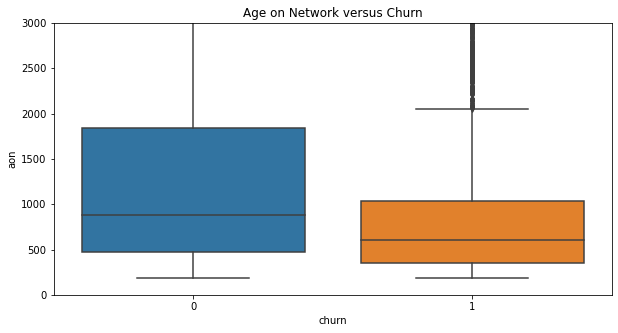

In [238]:
#plot age on network per user against churn
plt.figure(figsize=(10,5))
sns.boxplot(df['churn'], df['aon'])
plt.title('Age on Network versus Churn')
plt.ylim(0, 3000)
plt.show()

The longer the user been on network, the less likely to churn.

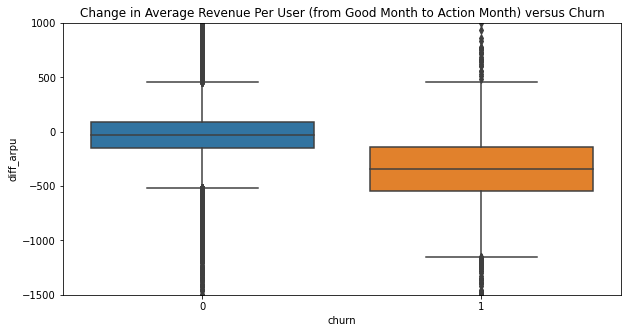

In [239]:
#plot change in average revenue per user against churn
plt.figure(figsize=(10,5))
sns.boxplot(df['churn'], df['diff_arpu'])
plt.title('Change in Average Revenue Per User (from Good Month to Action Month) versus Churn')
plt.ylim(-1500, 1000)
plt.show()

The users who churn are more likely to experience a drop in average revenue per user in the action month compared to the good month.

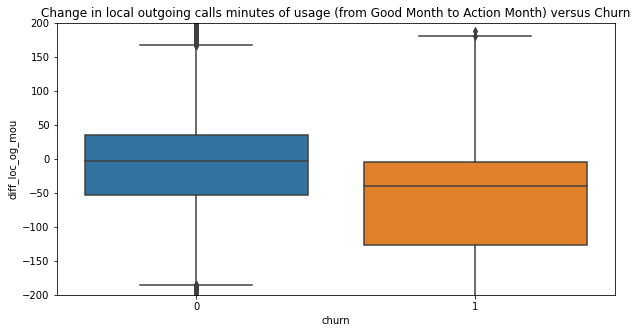

In [240]:
#plot change in local outgoing calls minutes of usage against churn
plt.figure(figsize=(10,5))
sns.boxplot(df['churn'], df['diff_loc_og_mou'])
plt.title('Change in local outgoing calls minutes of usage (from Good Month to Action Month) versus Churn')
plt.ylim(-200, 200)
plt.show()


The users who churn are more likely to experience a drop in local outgoing calls minutes of usage in the action month compared to the good month.

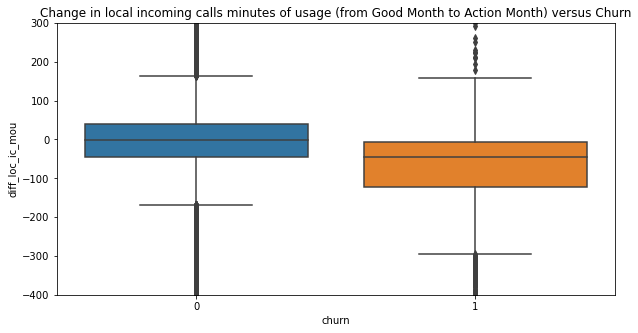

In [241]:
#plot change in local incoming calls minutes of usage against churn
plt.figure(figsize=(10,5))
sns.boxplot(df['churn'], df['diff_loc_ic_mou'])
plt.title('Change in local incoming calls minutes of usage (from Good Month to Action Month) versus Churn')
plt.ylim(-400, 300)
plt.show()

The users who churn are also more likely to experience a drop in local incoming calls minutes of usage in the action month compared to the good month.

## Section 2. Train Test Split

In [242]:
# get the churn rate
churn_rate = df['churn'].mean()
print(f'Churn rate is {round(churn_rate * 100, 2)}%')

Churn rate is 8.14%


Since churn rate is only 8.14%, we are dealing with imbalanced class. So we need to set stratify to yes as below.

In [243]:
# train test split of 70:30, also set stratify to yes since we are dealing with imbalanced class.
# train test split should have even proportion of labels
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df.drop('churn', axis=1), df['churn'], 
                                                    test_size=0.3, stratify=df['churn'], random_state=100)

In [244]:
#store the columns for future use
cols = X_train.columns

In [245]:
#print churn rate for y_train and y_test
print(f'Churn rate for y_train is: {round(y_train.mean()*100, 2)} pct')
print(f'Churn rate for y_test is: {round(y_test.mean()*100, 2)} pct')

Churn rate for y_train is: 8.14 pct
Churn rate for y_test is: 8.13 pct


## Section 3. Building a Prediction Model

### 3.1 Feature Scaling

We are going to build a prediction model. We will use PCA to reduce the number features. To use PCA, we need to first apply a scaling so that all variables are on comparable scale. We will use standard scaler as below.

In [246]:
#Create a MinMax scaler object
scaler = MinMaxScaler()
#y_scaler = MinMaxScaler()
#Fit and transform X_train and y_train
X_train = scaler.fit_transform(X_train)
#y_train = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
# using the MinMax scaler fitted on the train data to transform the variables in X_test
X_test = scaler.transform(X_test)
#y_test = y_scaler.transform(y_test.to_numpy().reshape(-1, 1))

### 3.2 Principal Component Analysis (PCA)

We apply PCA for dimensionality reduction and to create new uncorrelated features as below.

In [247]:
# create a PCA object
pca = PCA(random_state=100)
# fit PCA on X_train
pca.fit(X_train)

PCA(random_state=100)

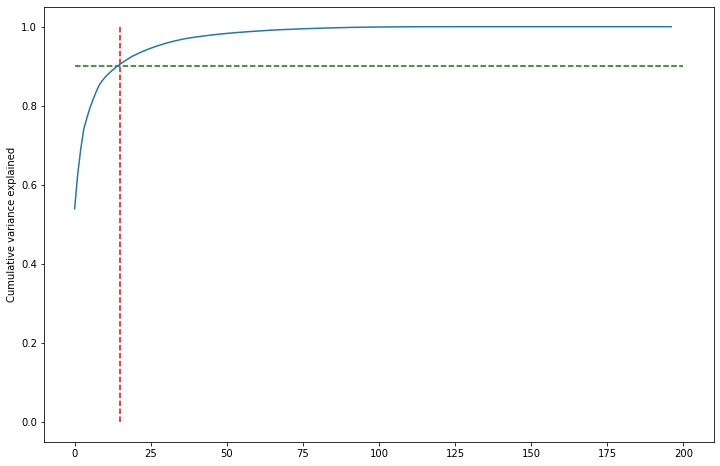

In [248]:
#make a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From above, looks like we need about 15 components to explain 90% of the variance in the model. But looks like we can go abit further as the slope is still steep at 15 components. Let's try 25 components.

### 3.3 Apply PCA for 25 components.

In [249]:
# create a PCA object for 25 components on training data
pca_final = IncrementalPCA(n_components=25)
# fit PCA on X_train and then transform the X_train data into the PCA basis
X_train_pca = pca_final.fit_transform(X_train)

# Check shape of X_train_pca
X_train_pca.shape

(21000, 25)

In [250]:
print(f'Total explained variance ratio from 25 components: {round(pca_final.explained_variance_ratio_.sum(), 2)}')

Total explained variance ratio from 25 components: 0.94


So 25 components explained 94% of the variance.

### 3.4 Logistic Regression on PCA data

After transforming the X_train data into the new basis, let's apply Logistic Regression model on it.

In [251]:
#Create logistic regression object, use class_weight balanced to take into account class imbalance
log_clf_pca = LogisticRegression(class_weight='balanced')
#Fit the logistic regression model using train data in new pca basis
log_model_pca = log_clf_pca.fit(X_train_pca, y_train)

#Also transform X_test data into new pca basis using pca fitted on X_train
X_test_pca = pca_final.transform(X_test)

#Check shape of X_test
X_test_pca.shape

(9001, 25)

In [252]:
# store the predicted probabilities for churn using test data 
log_pred_probs_test = log_model_pca.predict_proba(X_test_pca)[:,1]

In [253]:
# Function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

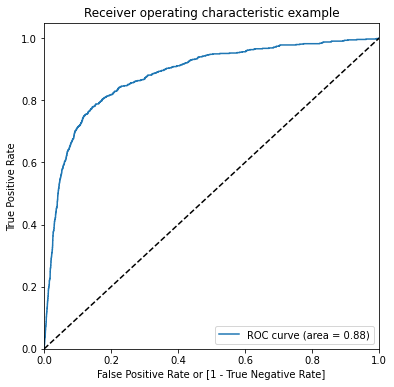

(array([0.00000000e+00, 0.00000000e+00, 1.20933607e-04, ...,
        9.99879066e-01, 1.00000000e+00, 1.00000000e+00]),
 array([0.        , 0.00136612, 0.00136612, ..., 0.99863388, 0.99863388,
        1.        ]),
 array([1.99943595e+00, 9.99435952e-01, 9.98247250e-01, ...,
        1.13440749e-06, 1.23390280e-09, 1.06661350e-12]))

In [254]:
#Draw the ROC curve
draw_roc(y_test, log_pred_probs_test)

In [255]:
log_AUC = round(metrics.roc_auc_score(y_test, log_pred_probs_test), 2)
print(f'Area under the curve is: {log_AUC}')

Area under the curve is: 0.88


It seems that the model performed well with an Area Under the Curve of 0.88. Let's create the predicted churn labels based on threshold of 0.5. 

In [256]:
# predicted labels based on threshold of 0.5
log_predicted_labels_test = np.where(log_pred_probs_test>=0.5, 1, 0)

In [257]:
#print recall score
log_recall = metrics.recall_score(y_test, log_predicted_labels_test)
print(f'Recall: {round(log_recall, 3)}')
#print precision score
log_precision = metrics.precision_score(y_test, log_predicted_labels_test)
print(f'Precision: {round(log_precision, 3)}')
#print accuracy score
log_accuracy = metrics.accuracy_score(y_test, log_predicted_labels_test)
print(f'Accuracy: {round(log_accuracy, 3)}')

Recall: 0.816
Precision: 0.271
Accuracy: 0.807


This model with a threshold of 0.5 is able to pick up 81.6% of churn cases. However, out of the positive predictions, it is only 27.1% accurate, which means that there is a 72.9% chance of getting false positives. The accuracy score is 80.7%.

### 3.5 XGBoost on PCA data

Let's try using XGBoost algorithm on the new PCA data.

In [258]:
#Create xgboost classifier object, use scale_pos_weight to deal with class imbalance. 
#scale_pos_weight is ratio of non-churn to churn
xgb_clf_pca = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic', scale_pos_weight=(1-churn_rate)/churn_rate)

In [259]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [50, 100, 150], # no of trees 
        'learning_rate' : [0.05, 0.1, 0.15],  # eta
        'min_child_weight': [3, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 5

param_comb = 100

#Create random search object to fit 100 parameter combinations
random_search = RandomizedSearchCV(xgb_clf_pca, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=3, 
                                   random_state=100)


In [260]:
#Fit the random search cross validation to the training data in PCA basis
random_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 22.7min finished


[11:44:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [261]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11.290454731667351,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.8938095238095236

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.5, 'colsample_bytree': 0.6}


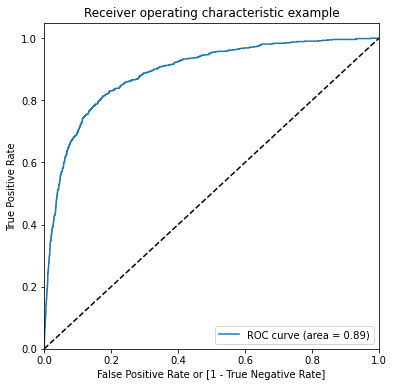

(array([0.        , 0.        , 0.        , ..., 0.99975813, 0.99987907,
        1.        ]),
 array([0.        , 0.00136612, 0.00273224, ..., 1.        , 1.        ,
        1.        ]),
 array([1.9906249e+00, 9.9062496e-01, 9.8986685e-01, ..., 6.1443185e-05,
        6.1411723e-05, 4.2671636e-05], dtype=float32))

In [262]:
# store the predicted probabilities for churn using test data 
xgb_pred_probs_test = random_search.predict_proba(X_test_pca)[:,1]

#Draw the ROC curve
draw_roc(y_test, xgb_pred_probs_test)

In [263]:
#Area under curve for XGB
xgb_AUC = round(metrics.roc_auc_score(y_test, xgb_pred_probs_test), 2)
print(f'Area under the curve is: {xgb_AUC}')

Area under the curve is: 0.89


It seems that the model performed well with an Area Under the Curve of 0.89. Let's create the predicted churn labels based on threshold of 0.5. 

In [264]:
# predicted labels based on threshold of 0.5
xgb_predicted_labels_test = np.where(xgb_pred_probs_test>=0.5, 1, 0)

In [265]:
#print recall score
xgb_recall = metrics.recall_score(y_test, xgb_predicted_labels_test)
print(f'Recall: {round(xgb_recall, 3)}')
#print precision score
xgb_precision = metrics.precision_score(y_test, xgb_predicted_labels_test)
print(f'Precision: {round(xgb_precision, 3)}')
#print accuracy score
xgb_accuracy = metrics.accuracy_score(y_test, xgb_predicted_labels_test)
print(f'Accuracy: {round(xgb_accuracy, 3)}')

Recall: 0.693
Precision: 0.386
Accuracy: 0.885


This model with a threshold of 0.5 is only able to pick up 69.3% of churn cases. Out of the positive predictions, it is 38.6% accurate, which means that there is a 61.4% chance of getting false positives. The accuracy score is 88.5%. We could do better on recall by reducing the threshold of 0.5 to 0.25 as below.

In [266]:
# predicted labels based on threshold of 0.25
xgb_predicted_labels_test = np.where(xgb_pred_probs_test>=0.25, 1, 0)

In [267]:
#print recall score
xgb_recall = metrics.recall_score(y_test, xgb_predicted_labels_test)
print(f'Recall: {round(xgb_recall, 3)}')
#print precision score
xgb_precision = metrics.precision_score(y_test, xgb_predicted_labels_test)
print(f'Precision: {round(xgb_precision, 3)}')
#print accuracy score
xgb_accuracy = metrics.accuracy_score(y_test, xgb_predicted_labels_test)
print(f'Accuracy: {round(xgb_accuracy, 3)}')

Recall: 0.817
Precision: 0.284
Accuracy: 0.818


This model with a threshold of 0.25 is able to pick up 81.7% of churn cases. Out of the positive predictions, it is 28.4% accurate, which means that there is a 71.6% chance of getting false positives. The accuracy score is 81.8%. This XGBoost model performed slightly better than the logistic regression model.

## Section 4. Building an Explainable Model

So far what we have done is to reduce the dimensionality first by using PCA. But the results can't be easily explained as new uncorrelated features were created to build the model. Now let's try build a model which can explain which features are important in explaining churn probability.

### 4.1 Random Forest Model

In [268]:
#Create random forest classifier object, use class weight='balanced' to deal with class imbalanced problem 

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

In [269]:
# A parameter grid for RandomForest
params = {
        'max_depth': [4,6,8],
        'min_samples_leaf': [200,400,600],
        'min_samples_split': [300,600,900],
        'n_estimators': [100,200,300], 
        'max_features': [5, 10]
        }

folds = 5

param_comb = 100

#Create random search object to fit 100 parameter combinations
random_search = RandomizedSearchCV(rf_clf, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=3, 
                                   random_state=100)

In [270]:
#Fit the random search cross validation to the training data in PCA basis
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 17.8min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [4, 6, 8],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': [200, 400, 600],
                                        'min_samples_split': [300, 600, 900],
                                        'n_estimators': [100, 200, 300]},
                   random_state=100, scoring='accuracy', verbose=3)

In [271]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=10,
                       min_samples_leaf=200, min_samples_split=300,
                       n_estimators=300, n_jobs=-1, random_state=0)

 Best accuracy for 5-fold search with 100 parameter combinations:
0.8932380952380952

 Best hyperparameters:
{'n_estimators': 300, 'min_samples_split': 300, 'min_samples_leaf': 200, 'max_features': 10, 'max_depth': 4}


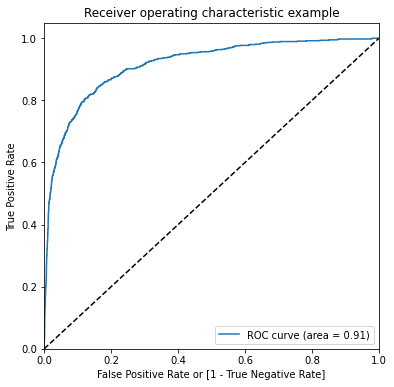

(array([0.        , 0.        , 0.        , ..., 0.99975813, 0.99987907,
        1.        ]),
 array([0.        , 0.00136612, 0.00273224, ..., 1.        , 1.        ,
        1.        ]),
 array([1.95213786, 0.95213786, 0.95209056, ..., 0.09036648, 0.08954087,
        0.08885129]))

In [272]:
# store the predicted probabilities for churn using test data 
rf_pred_probs_test = random_search.predict_proba(X_test)[:,1]

#Draw the ROC curve
draw_roc(y_test, rf_pred_probs_test)

In [273]:
#Area under curve for Random Forest
rf_AUC = round(metrics.roc_auc_score(y_test, rf_pred_probs_test), 2)
print(f'Area under the curve is: {rf_AUC}')

Area under the curve is: 0.91


It seems that the model performed well with an Area Under the Curve of 0.91. Let's create the predicted churn labels based on threshold of 0.5. 

In [274]:
# predicted labels based on threshold of 0.5
rf_predicted_labels_test = np.where(rf_pred_probs_test>=0.5, 1, 0)

In [275]:
rf_predicted_labels_test

array([0, 0, 0, ..., 0, 0, 0])

In [276]:
y_test.shape

(9001,)

In [277]:
#print recall score
rf_recall = metrics.recall_score(y_test, rf_predicted_labels_test)
print(f'Recall: {round(rf_recall, 3)}')
#print precision score
rf_precision = metrics.precision_score(y_test, rf_predicted_labels_test)
print(f'Precision: {round(rf_precision, 3)}')
#print accuracy score
rf_accuracy = metrics.accuracy_score(y_test, rf_predicted_labels_test)
print(f'Accuracy: {round(rf_accuracy, 3)}')

Recall: 0.755
Precision: 0.408
Accuracy: 0.891


This model with a threshold of 0.5 is able to pick up 75.5% of churn cases. Out of the positive predictions, it is 40.8% accurate, which means that there is a 59.2% chance of getting false positives. The accuracy score is 89.1%. We could do better on recall by reducing the threshold of 0.5 to 0.35 as below.

In [278]:
# predicted labels based on threshold of 0.40
rf_predicted_labels_test = np.where(rf_pred_probs_test>=0.40, 1, 0)

In [279]:
#print recall score
rf_recall = metrics.recall_score(y_test, rf_predicted_labels_test)
print(f'Recall: {round(rf_recall, 3)}')
#print precision score
rf_precision = metrics.precision_score(y_test, rf_predicted_labels_test)
print(f'Precision: {round(rf_precision, 3)}')
#print accuracy score
rf_accuracy = metrics.accuracy_score(y_test, rf_predicted_labels_test)
print(f'Accuracy: {round(rf_accuracy, 3)}')

Recall: 0.84
Precision: 0.318
Accuracy: 0.84


This model with a threshold of 0.4 is able to pick up 84% of churn cases. Out of the positive predictions, it is 31.8% accurate, which means that there is a 68.2% chance of getting false positives. The accuracy score is 84%. So the random forest algorithm actually performed better in this case.

In [280]:
# store the feature_importance
feature_importance = random_search.best_estimator_.feature_importances_

In [281]:
# create dataframe which shows the feature importance
feature_importance_df = pd.DataFrame(feature_importance, index=cols)
feature_importance_df.rename({0:'feature_importance'}, axis=1, inplace=True)

In [282]:
# sort features by feature importance 
feature_importance_df.sort_values(by='feature_importance', ascending=False).head(30)

,feature_importance
loc_ic_t2m_mou_8,0.082486
loc_ic_mou_8,0.071212
diff_total_rech_amt,0.047914
total_ic_mou_8,0.047153
diff_arpu,0.039998
loc_ic_t2t_mou_8,0.036448
total_og_mou_8,0.035137
loc_og_t2t_mou_8,0.035075
loc_og_mou_8,0.034676
arpu_8,0.033106


It seems that all the important features are described by either August data or the new features that we created (difference between August numbers and average June & July numbers).

### 4.2 Logistic Regression Model

We can build a logistic regression model based on the important features found by the random forest model above.

In [283]:
#important features identified by random forest
important_cols = feature_importance_df.sort_values(by='feature_importance', ascending=False).head(30).index

In [284]:
#Fit the logistic regression model with these features
X_train_df = pd.DataFrame(X_train, columns=df.drop('churn', axis=1).columns)
X = X_train_df[important_cols]

log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3876.7
Date:                Mon, 22 Feb 2021   Deviance:                       7753.3
Time:                        12:02:26   Pearson chi2:                 3.89e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.3246      1.246     12.300      0.000      12.883      17.767
loc_ic_t2m_mou_8     3.442e+05   2.68e+04     12.863      0.000    2.92e+05    3.97e+05
loc_ic_mou_8        -3.995e+05   3.11e+04    -12.864      0.000    -4.6e+05   -3.39e+05
diff_total_rech_amt   -15.1208      6.332     -2.388      0.017     -27.530      -2.711
total_ic_mou_8         -7.9059      6.112     -1.294      0.196     -19.885       4.073
diff_arpu              -8.3725      6.760     -1.239      0.215     -21.621       4.876
loc_ic_t2t_mou_8     2.968e+05   2.31e+04     12.863      0.000    2.52e+05    3.42e+05
total_og_mou_8        -52.2755     72.693     -0.719      0.472    -194.752      90.201
loc_og_t2t_mou_8       52.8823     44.993      1.175      0.240     -35.302     141.067
loc_og_mou_8          -60.3736     45.796     -1.318      0.187    -150.132      29.385
arpu_8                 -0.4259     18.460     -0.023      0.982     -36.607      35.755
loc_og_t2m_mou_8       20.3477     20.975      0.970      0.332     -20.763      61.459
last_day_rch_amt_8    -12.5523      1.726     -7.274      0.000     -15.935      -9.170
total_rech_amt_8        3.5817     20.638      0.174      0.862     -36.869      44.032
loc_ic_t2f_mou_8     9.708e+04   7547.211     12.864      0.000    8.23e+04    1.12e+05
diff_total_og_mou       0.2655      3.752      0.071      0.944      -7.088       7.619
diff_total_rech_num    -5.3114      1.302     -4.079      0.000      -7.864      -2.759
max_rech_amt_8          5.3237      1.314      4.051      0.000       2.748       7.899
av_rech_amt_data_8     -6.5328      2.051     -3.185      0.001     -10.553      -2.513
roam_og_mou_8         -10.4932     27.755     -0.378      0.705     -64.892      43.905
std_ic_mou_8           -5.1345      9.424     -0.545      0.586     -23.606      13.337
std_ic_t2m_mou_8        7.7997      8.260      0.944      0.345      -8.389      23.988
roam_ic_mou_8           0.9150      0.916      0.999      0.318      -0.881       2.711
onnet_mou_8            34.3370     55.723      0.616      0.538     -74.877     143.551
diff_total_ic_mou      -6.0804      2.887     -2.106      0.035     -11.739      -0.421
diff_loc_ic_mou        -5.3562      2.522     -2.124      0.034     -10.300      -0.413
vol_2g_mb_8            -8.6272      2.719     -3.173      0.002     -13.956      -3.299
max_rech_data_8         1.9276      1.372      1.405      0.160      -0.761       4.616
diff_std_og_mou        -0.3528      3.721     -0.095      0.924      -7.645       6.940
fb_user_8              -1.1765      0.123     -9.527      0.000      -1.419      -0.934
offnet_mou_8           41.0004     72.577      0.565      0.572    -101.248     183.249
=======================================================================================
"""

It appears above that many variables are insignificant. I will remove those with p-value greater than 0.50 first.

In [285]:
#remove variables with p-value greater than 0.50
X.drop(['arpu_8', 'total_rech_amt_8', 'diff_total_og_mou', 'roam_og_mou_8', 
         'std_ic_mou_8', 'onnet_mou_8', 'diff_std_og_mou', 'offnet_mou_8'], axis=1, inplace=True)

In [286]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20977
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3888.5
Date:                Mon, 22 Feb 2021   Deviance:                       7777.0
Time:                        12:02:26   Pearson chi2:                 4.75e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.0434      1.083     13.889      0.000      12.921      17.166
loc_ic_t2m_mou_8     3.473e+05   2.67e+04     13.007      0.000    2.95e+05       4e+05
loc_ic_mou_8        -4.031e+05    3.1e+04    -13.008      0.000   -4.64e+05   -3.42e+05
diff_total_rech_amt   -15.4044      3.103     -4.965      0.000     -21.486      -9.323
total_ic_mou_8         -9.9770      4.546     -2.195      0.028     -18.887      -1.067
diff_arpu              -7.0455      3.472     -2.029      0.042     -13.851      -0.240
loc_ic_t2t_mou_8     2.995e+05    2.3e+04     13.007      0.000    2.54e+05    3.45e+05
total_og_mou_8         -9.1243      1.176     -7.761      0.000     -11.428      -6.820
loc_og_t2t_mou_8       64.2488     45.551      1.410      0.158     -25.030     153.528
loc_og_mou_8          -70.6385     46.424     -1.522      0.128    -161.628      20.351
loc_og_t2m_mou_8       24.1093     21.276      1.133      0.257     -17.591      65.810
last_day_rch_amt_8    -11.4902      1.671     -6.876      0.000     -14.765      -8.215
loc_ic_t2f_mou_8     9.796e+04   7531.137     13.007      0.000    8.32e+04    1.13e+05
diff_total_rech_num    -5.2228      1.276     -4.093      0.000      -7.724      -2.722
max_rech_amt_8          5.9929      1.138      5.267      0.000       3.763       8.223
av_rech_amt_data_8     -6.5066      2.044     -3.183      0.001     -10.513      -2.500
std_ic_t2m_mou_8        3.7563      6.086      0.617      0.537      -8.172      15.685
roam_ic_mou_8           3.0757      0.826      3.725      0.000       1.457       4.694
diff_total_ic_mou      -6.0517      2.877     -2.103      0.035     -11.691      -0.412
diff_loc_ic_mou        -5.5876      2.432     -2.297      0.022     -10.355      -0.820
vol_2g_mb_8            -8.2264      2.685     -3.063      0.002     -13.490      -2.963
max_rech_data_8         1.9058      1.366      1.395      0.163      -0.772       4.584
fb_user_8              -1.2115      0.124     -9.800      0.000      -1.454      -0.969
=======================================================================================
"""

Let's check the VIF. High VIF indicates multi collinearity.

In [287]:
#user-defined function to get the VIF

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns 
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [288]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
1,loc_ic_mou_8,3.744104e+09
0,loc_ic_t2m_mou_8,1.729580e+09
5,loc_ic_t2t_mou_8,7.865910e+08
11,loc_ic_t2f_mou_8,5.094595e+07
17,diff_total_ic_mou,1.745410e+03
18,diff_loc_ic_mou,9.969700e+02
4,diff_arpu,9.732000e+02
2,diff_total_rech_amt,7.062400e+02
12,diff_total_rech_num,6.002300e+02
8,loc_og_mou_8,5.624500e+02


We can see above that some features have high multi collinearity and are causing the coefficients to be very unstable. Obviously `loc_ic_mou_8`, `loc_ic_t2m_mou_8`, `loc_ic_t2t_mou_8` and `loc_ic_t2f_mou_8` can be removed as they have high VIF and very unstable coefficients.

In [289]:
# drop the highly collinear features
X.drop(['loc_ic_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8'], axis=1, inplace=True)

In [290]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.8
Date:                Mon, 22 Feb 2021   Deviance:                       7971.6
Time:                        12:02:27   Pearson chi2:                 5.06e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.6199      1.076     14.523      0.000      13.512      17.728
diff_total_rech_amt   -15.7612      3.171     -4.970      0.000     -21.977      -9.545
total_ic_mou_8        -32.5989      2.483    -13.130      0.000     -37.465     -27.733
diff_arpu              -8.2313      3.536     -2.328      0.020     -15.161      -1.301
total_og_mou_8        -10.4987      1.199     -8.755      0.000     -12.849      -8.148
loc_og_t2t_mou_8       94.3044     50.238      1.877      0.060      -4.160     192.769
loc_og_mou_8         -103.1258     51.240     -2.013      0.044    -203.555      -2.697
loc_og_t2m_mou_8       35.8630     23.436      1.530      0.126     -10.070      81.796
last_day_rch_amt_8    -11.7369      1.745     -6.727      0.000     -15.156      -8.317
diff_total_rech_num    -5.3875      1.268     -4.249      0.000      -7.872      -2.903
max_rech_amt_8          5.6703      1.185      4.784      0.000       3.347       7.993
av_rech_amt_data_8     -6.6790      2.059     -3.244      0.001     -10.714      -2.644
std_ic_t2m_mou_8       23.9323      4.986      4.800      0.000      14.161      33.704
roam_ic_mou_8           3.7577      0.839      4.478      0.000       2.113       5.402
diff_total_ic_mou      -7.2754      2.863     -2.541      0.011     -12.887      -1.664
diff_loc_ic_mou        -4.5166      2.420     -1.866      0.062      -9.260       0.227
vol_2g_mb_8            -8.7120      2.721     -3.202      0.001     -14.045      -3.379
max_rech_data_8         2.5277      1.378      1.834      0.067      -0.173       5.229
fb_user_8              -1.3008      0.124    -10.523      0.000      -1.543      -1.059
=======================================================================================
"""

In [291]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
13,diff_total_ic_mou,1647.29
2,diff_arpu,972.57
14,diff_loc_ic_mou,924.99
0,diff_total_rech_amt,706.04
8,diff_total_rech_num,597.29
5,loc_og_mou_8,506.61
6,loc_og_t2m_mou_8,221.34
4,loc_og_t2t_mou_8,152.47
16,max_rech_data_8,5.12


`loc_og_mou_8`, `loc_og_t2m_mou_8` and `loc_og_t2t_mou_8` are likely to be very similar. We can remove 2 of them as below.

In [292]:
#remove 2 features which are likely to be explained by another
X.drop(['loc_og_t2m_mou_8', 'loc_og_t2t_mou_8'], axis=1, inplace=True)

In [293]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20983
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3989.8
Date:                Mon, 22 Feb 2021   Deviance:                       7979.7
Time:                        12:02:28   Pearson chi2:                 1.61e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.6865      1.077     14.566      0.000      13.576      17.797
diff_total_rech_amt   -14.9557      3.158     -4.736      0.000     -21.146      -8.766
total_ic_mou_8        -33.5916      2.502    -13.424      0.000     -38.496     -28.687
diff_arpu              -9.1820      3.521     -2.608      0.009     -16.082      -2.282
total_og_mou_8        -10.2391      1.193     -8.584      0.000     -12.577      -7.901
loc_og_mou_8          -17.6738      3.740     -4.726      0.000     -25.003     -10.344
last_day_rch_amt_8    -11.8066      1.763     -6.696      0.000     -15.262      -8.351
diff_total_rech_num    -5.4317      1.269     -4.281      0.000      -7.918      -2.945
max_rech_amt_8          5.2513      1.171      4.483      0.000       2.955       7.547
av_rech_amt_data_8     -6.6460      2.057     -3.231      0.001     -10.678      -2.614
std_ic_t2m_mou_8       24.7297      5.032      4.914      0.000      14.867      34.593
roam_ic_mou_8           3.8656      0.843      4.587      0.000       2.214       5.517
diff_total_ic_mou      -7.2388      2.870     -2.522      0.012     -12.864      -1.614
diff_loc_ic_mou        -4.5403      2.426     -1.872      0.061      -9.295       0.214
vol_2g_mb_8            -8.6735      2.719     -3.190      0.001     -14.002      -3.345
max_rech_data_8         2.5845      1.378      1.875      0.061      -0.117       5.286
fb_user_8              -1.2967      0.124    -10.481      0.000      -1.539      -1.054
=======================================================================================
"""

In [294]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
11,diff_total_ic_mou,1643.71
2,diff_arpu,963.95
12,diff_loc_ic_mou,924.45
0,diff_total_rech_amt,701.58
6,diff_total_rech_num,597.14
14,max_rech_data_8,5.12


`diff_total_ic_mou` and `diff_loc_ic_mou` are likely to be highly correlated. We can remove `diff_loc_ic_mou` with a higher p-value.

In [295]:
#Drop diff_loc_ic_mou
X.drop('diff_loc_ic_mou', axis=1, inplace=True)

In [296]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3991.8
Date:                Mon, 22 Feb 2021   Deviance:                       7983.6
Time:                        12:02:29   Pearson chi2:                 1.59e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  16.2588      0.958     16.978      0.000      14.382      18.136
diff_total_rech_amt   -14.9702      3.155     -4.745      0.000     -21.154      -8.786
total_ic_mou_8        -33.3497      2.494    -13.371      0.000     -38.238     -28.461
diff_arpu              -9.2061      3.518     -2.617      0.009     -16.101      -2.311
total_og_mou_8        -10.3639      1.193     -8.684      0.000     -12.703      -8.025
loc_og_mou_8          -17.6151      3.744     -4.705      0.000     -24.954     -10.276
last_day_rch_amt_8    -11.8728      1.770     -6.709      0.000     -15.342      -8.404
diff_total_rech_num    -5.5402      1.270     -4.364      0.000      -8.029      -3.052
max_rech_amt_8          5.2380      1.171      4.474      0.000       2.943       7.533
av_rech_amt_data_8     -6.6935      2.063     -3.244      0.001     -10.737      -2.650
std_ic_t2m_mou_8       24.3713      5.068      4.808      0.000      14.437      34.305
roam_ic_mou_8           3.8454      0.844      4.558      0.000       2.192       5.499
diff_total_ic_mou     -11.4841      1.379     -8.328      0.000     -14.187      -8.782
vol_2g_mb_8            -8.7047      2.719     -3.201      0.001     -14.035      -3.375
max_rech_data_8         2.5750      1.382      1.863      0.062      -0.134       5.284
fb_user_8              -1.2966      0.124    -10.473      0.000      -1.539      -1.054
=======================================================================================
"""

In [297]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
2,diff_arpu,960.20
0,diff_total_rech_amt,701.16
6,diff_total_rech_num,585.79
11,diff_total_ic_mou,430.89
13,max_rech_data_8,5.12


In [298]:
#Let's check the correlation
X.corr()

,diff_total_rech_amt,total_ic_mou_8,diff_arpu,total_og_mou_8,loc_og_mou_8,last_day_rch_amt_8,diff_total_rech_num,max_rech_amt_8,av_rech_amt_data_8,std_ic_t2m_mou_8,roam_ic_mou_8,diff_total_ic_mou,vol_2g_mb_8,max_rech_data_8,fb_user_8
diff_total_rech_amt,1.000000,0.132556,0.824211,0.280844,0.159648,0.264134,0.525212,0.320819,0.223117,0.063405,0.035158,0.226353,0.087702,0.175954,0.195778
total_ic_mou_8,0.132556,1.000000,0.142062,0.205030,0.407403,0.121388,0.105561,0.165713,0.038898,0.390055,-0.021230,0.363781,-0.029186,0.062882,0.041051
diff_arpu,0.824211,0.142062,1.000000,0.315983,0.178126,0.160981,0.539848,0.204746,0.215257,0.069945,0.042089,0.247835,0.083669,0.167414,0.175858
total_og_mou_8,0.280844,0.205030,0.315983,1.000000,0.487756,0.126137,0.246186,0.146612,-0.145945,0.129447,-0.043042,0.145135,-0.093013,-0.147168,-0.230171
loc_og_mou_8,0.159648,0.407403,0.178126,0.487756,1.000000,0.181697,0.128668,0.214693,-0.011854,0.031238,-0.042081,0.120889,-0.063067,0.007676,-0.056024
last_day_rch_amt_8,0.264134,0.121388,0.160981,0.126137,0.181697,1.000000,0.040848,0.710422,0.142657,0.031927,0.056380,0.049005,-0.025351,0.203770,0.028327
diff_total_rech_num,0.525212,0.105561,0.539848,0.246186,0.128668,0.040848,1.000000,0.090519,0.150802,0.054496,0.006889,0.222678,0.093833,0.084814,0.157123
max_rech_amt_8,0.320819,0.165713,0.204746,0.146612,0.214693,0.710422,0.090519,1.000000,0.247173,0.068575,0.099302,0.060134,0.005260,0.358540,0.103843
av_rech_amt_data_8,0.223117,0.038898,0.215257,-0.145945,-0.011854,0.142657,0.150802,0.247173,1.000000,0.004192,-0.006881,0.058406,0.232574,0.799684,0.627453
std_ic_t2m_mou_8,0.063405,0.390055,0.069945,0.129447,0.031238,0.031927,0.054496,0.068575,0.004192,1.000000,0.022637,0.203858,-0.003216,0.011915,-0.003472


We get a clearer picture that `diff_arpu` and `diff_total_rech_amt` are causing the high VIF of these two features. Let's remove `diff_arpu`.

In [299]:
#drop diff_arpu
X.drop('diff_arpu', inplace=True, axis=1)

In [300]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3995.5
Date:                Mon, 22 Feb 2021   Deviance:                       7991.0
Time:                        12:02:29   Pearson chi2:                 1.90e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.8985      0.946     16.808      0.000      14.045      17.752
diff_total_rech_amt   -21.2154      1.888    -11.236      0.000     -24.916     -17.515
total_ic_mou_8        -33.3266      2.496    -13.354      0.000     -38.218     -28.435
total_og_mou_8        -10.6168      1.189     -8.926      0.000     -12.948      -8.286
loc_og_mou_8          -18.6310      3.743     -4.978      0.000     -25.967     -11.295
last_day_rch_amt_8    -12.3072      1.685     -7.304      0.000     -15.610      -9.005
diff_total_rech_num    -6.2933      1.241     -5.069      0.000      -8.726      -3.860
max_rech_amt_8          5.6178      1.177      4.771      0.000       3.310       7.926
av_rech_amt_data_8     -6.7301      2.059     -3.268      0.001     -10.766      -2.694
std_ic_t2m_mou_8       24.1166      5.094      4.735      0.000      14.133      34.100
roam_ic_mou_8           3.6800      0.836      4.404      0.000       2.042       5.318
diff_total_ic_mou     -11.8560      1.368     -8.668      0.000     -14.537      -9.175
vol_2g_mb_8            -8.7713      2.719     -3.226      0.001     -14.101      -3.442
max_rech_data_8         2.5709      1.378      1.866      0.062      -0.129       5.271
fb_user_8              -1.3050      0.124    -10.547      0.000      -1.547      -1.062
=======================================================================================
"""

In [301]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
5,diff_total_rech_num,543.85
10,diff_total_ic_mou,404.01
0,diff_total_rech_amt,327.49
12,max_rech_data_8,5.10


`diff_total_rech_amt` and `diff_total_rech_num` are likely to be highly collinear. Let's remove `diff_total_rech_num`.

In [302]:
#drop diff_total_rech_num
X.drop('diff_total_rech_num', inplace=True, axis=1)

In [303]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4008.8
Date:                Mon, 22 Feb 2021   Deviance:                       8017.6
Time:                        12:02:30   Pearson chi2:                 2.09e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.2317      0.881     16.161      0.000      12.506      15.958
diff_total_rech_amt   -25.1630      1.725    -14.591      0.000     -28.543     -21.783
total_ic_mou_8        -33.6329      2.501    -13.450      0.000     -38.534     -28.732
total_og_mou_8        -10.9873      1.192     -9.220      0.000     -13.323      -8.652
loc_og_mou_8          -19.5340      3.763     -5.191      0.000     -26.909     -12.159
last_day_rch_amt_8    -12.4458      1.693     -7.352      0.000     -15.764      -9.128
max_rech_amt_8          5.2819      1.207      4.376      0.000       2.916       7.648
av_rech_amt_data_8     -7.2676      2.088     -3.480      0.001     -11.361      -3.175
std_ic_t2m_mou_8       24.1801      5.169      4.678      0.000      14.049      34.311
roam_ic_mou_8           3.5320      0.839      4.211      0.000       1.888       5.176
diff_total_ic_mou     -12.5278      1.360     -9.209      0.000     -15.194      -9.861
vol_2g_mb_8            -8.9339      2.732     -3.271      0.001     -14.288      -3.580
max_rech_data_8         2.7272      1.385      1.969      0.049       0.013       5.442
fb_user_8              -1.3155      0.125    -10.564      0.000      -1.560      -1.071
=======================================================================================
"""

In [304]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
0,diff_total_rech_amt,232.23
9,diff_total_ic_mou,216.91
11,max_rech_data_8,5.09


Finally we can remove `diff_total_ic_mou` since it is highly collinear with `diff_total_rech_amt`.

In [305]:
#Drop diff_total_ic_mou
X.drop('diff_total_ic_mou', inplace=True, axis=1)

In [306]:
#re-fit the model
log_reg = sm.GLM(y_train.values.reshape(-1, 1), (sm.add_constant(X)), family = sm.families.Binomial())
log_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4048.1
Date:                Mon, 22 Feb 2021   Deviance:                       8096.2
Time:                        12:02:30   Pearson chi2:                 3.90e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.4339      0.457     16.266      0.000       6.538       8.330
diff_total_rech_amt   -28.5133      1.681    -16.965      0.000     -31.807     -25.219
total_ic_mou_8        -33.9061      2.485    -13.646      0.000     -38.776     -29.036
total_og_mou_8        -11.9435      1.201     -9.948      0.000     -14.297      -9.590
loc_og_mou_8          -19.3240      3.759     -5.141      0.000     -26.692     -11.956
last_day_rch_amt_8    -12.7338      1.696     -7.510      0.000     -16.057      -9.411
max_rech_amt_8          5.1457      1.227      4.194      0.000       2.741       7.550
av_rech_amt_data_8     -7.2767      2.085     -3.490      0.000     -11.363      -3.191
std_ic_t2m_mou_8       23.3406      5.091      4.584      0.000      13.362      33.320
roam_ic_mou_8           4.3284      0.870      4.978      0.000       2.624       6.033
vol_2g_mb_8            -8.5785      2.682     -3.198      0.001     -13.836      -3.321
max_rech_data_8         2.7544      1.375      2.003      0.045       0.060       5.449
fb_user_8              -1.3492      0.124    -10.876      0.000      -1.592      -1.106
=======================================================================================
"""

In [307]:
# Check VIF and display variables with VIF > 5
vif = get_vif(X)
vif[vif['VIF'] > 5]

,Features,VIF
10,max_rech_data_8,5.04


### Prediction

Let's make predictions on the test set with the logistic regression model

In [308]:
#Logistic regression model using sklearn

logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X[X.columns], y_train)


LogisticRegression(class_weight='balanced')

In [309]:
#Create X_test_df first
X_test_df = pd.DataFrame(X_test, columns=df.drop('churn', axis=1).columns)
X_test_df = X_test_df[X.columns]

In [310]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test_df)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.059360
1,0.073027
2,0.405004
3,0.790474
4,0.175146


In [311]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [312]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [313]:
y_pred_final.head()

,churn,1
0,0,0.059360
1,0,0.073027
2,0,0.405004
3,0,0.790474
4,0,0.175146


In [314]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={'churn': 'Churn', 1 : 'Churn_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Prob
0,0,0.059360
1,0,0.073027
2,0,0.405004
3,0,0.790474
4,0,0.175146


In [315]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.059360,0
1,0,0.073027,0
2,0,0.405004,0
3,0,0.790474,1
4,0,0.175146,0


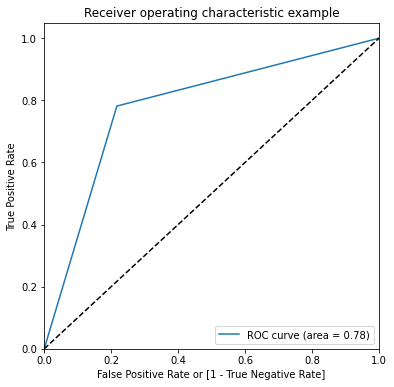

(array([0.        , 0.21707583, 1.        ]),
 array([0.        , 0.78142077, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [316]:
#draw roc curve
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [317]:
y_pred[:, 1].shape

(9001,)

In [318]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'0.87'

In [319]:
#print recall score
log_recall = metrics.recall_score(y_pred_final.Churn, y_pred_final.predicted)
print(f'Recall: {round(log_recall, 3)}')
#print precision score
log_precision = metrics.precision_score(y_pred_final.Churn, y_pred_final.predicted)
print(f'Precision: {round(log_precision, 3)}')
#print accuracy score
log_accuracy = metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)
print(f'Accuracy: {round(log_accuracy, 3)}')

Recall: 0.781
Precision: 0.242
Accuracy: 0.783


This model with a threshold of 0.5 is able to pick up 78.1% of churn cases. Out of the positive predictions, it is 24.2% accurate, which means that there is a 75.8% chance of getting false positives. The accuracy score is 78.3%. This logistic regression model is less accurate compared to the random forest model.

## Section 5. Recommendations & Business Insights

The Random Forest algorithm did the best in prediction, possibly due to the fact that there's some non-linearity in the data.

Few of the most important features which can be identified from the logistic regression model are:

1. `diff_total_rech_amt`: This tells us how much changes in the total recharge amountin August compared to the average in June and July. The more negative the changes, the higher likelihood that a churn is going to occur.
2. `total_ic_mou_8` and `total_og_mou_8`: Churners are likely to have low total incoming calls and outgoing calls minutes of usage.
3. `vol_2g_mb_8`: Churners are likely to have used little volume of data.
4. `fb_user_8`: facebook users are more likely to churn because they are more internet savvy customers who are also more likely to find alternatives.

Actions that can be derived are:
1. For users who have very low total incoming and outgoing calls and have used very little internet in August, offer promotions for them such as for every 100 minutes of call and you get additional volume of data.
2. Offer promotions on facebook page to target these facebook users who are also more likely to churn.
3. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
4. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
5. To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 